## Data Exploration

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn
plt.style.use('ggplot')
%matplotlib inline

# Try bootstrapping (bagging)
# ensemble (diff data in same model)
# standard scaler??
# Grid-search or randomize search CV Bayes search cv?  Gric search cv in sklearn
# pipelines
# voting (same data in different models)
# AUC good for unbalaced data?
# remove outliers for improvement? 
# dummie variables on category 
# KFolds 
# Interaction variables

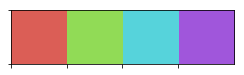

In [2]:
# sns.palplot(sns.color_palette("hls", 4))

# pal = dict(enumerate(sns.color_palette("hls", 4)))

In [4]:
df = pd.read_csv('../data/processed/avito_train_search_stream_data.csv')
# df = raw_df.dropna()
print(df.shape)
df.head()

(1116491, 15)


,Unnamed: 0,search_id,is_click,ad_id,position,hist_ctr,category,price,user_id,num_searches,first_search_date,last_search_date,num_days,num_land_page_views,num_phone_req
0,0,121.0,1.0,1220223.0,7.0,0.005422,22.0,1000.0,3817669.0,3,2015-05-01,2015-05-09,8,147.0,0.0
1,1,438.0,1.0,29135166.0,1.0,0.004846,50.0,878.0,2675985.0,8,2015-05-01,2015-05-15,14,2231.0,2.0
2,2,466.0,1.0,6955209.0,7.0,0.007163,42.0,450.0,991573.0,2,2015-05-11,2015-05-18,7,105.0,7.0
3,3,488.0,0.0,20058023.0,1.0,0.008362,40.0,799.0,632068.0,1,2015-05-08,2015-05-08,1,47.0,4.0
4,4,518.0,1.0,24728248.0,1.0,0.004281,7.0,40000.0,1617123.0,1,2015-04-27,2015-04-27,1,49.0,2.0


0.0    566490
1.0    550001
Name: is_click, dtype: int64


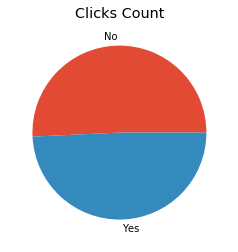

In [6]:
clicks = df['is_click'].value_counts()
print(clicks)
plt.pie(clicks.values, labels=['No', 'Yes'])
plt.title('Clicks Count');
# plt.xticks(clicks.index);

In [7]:
cols = ['position', 'hist_ctr', 'category', 'price', 'num_searches',
        'num_days', 'num_land_page_views', 'num_phone_req']
df[cols].describe()

,position,hist_ctr,category,price,num_searches,num_days,num_land_page_views,num_phone_req
count,1.116491e+06,1.116491e+06,1.116491e+06,1.116491e+06,1.116491e+06,1.116491e+06,1.116491e+06,1.116491e+06
mean,3.284946e+00,1.321709e-02,3.123107e+01,1.915636e+04,3.597994e+00,6.321330e+00,3.631822e+02,1.398205e+01
std,2.913538e+00,1.729732e-02,1.505933e+01,1.178638e+05,4.367011e+00,6.718465e+00,5.942412e+02,1.796982e+02
min,1.000000e+00,1.000000e-05,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,3.385000e-03,2.200000e+01,1.380000e+03,1.000000e+00,1.000000e+00,6.100000e+01,1.000000e+00
50%,1.000000e+00,7.568000e-03,3.900000e+01,4.450000e+03,2.000000e+00,2.000000e+00,1.750000e+02,4.000000e+00
75%,7.000000e+00,1.616200e-02,4.400000e+01,1.299000e+04,4.000000e+00,1.200000e+01,4.340000e+02,1.300000e+01
max,7.000000e+00,1.000000e+00,5.700000e+01,4.500000e+07,9.300000e+01,2.500000e+01,9.115500e+04,8.712800e+04


In [13]:
# df['search_id'].value_counts(dropna=False)
df[df['search_id']==15640613.0]

,Unnamed: 0,search_id,is_click,ad_id,position,hist_ctr,category,price,user_id,num_searches,first_search_date,last_search_date,num_days,num_land_page_views,num_phone_req
153352,153398,15640613.0,1.0,12611795.0,7.0,0.003386,7.0,1400.0,3710576.0,4,2015-05-15,2015-05-15,1,10.0,5.0
153353,153399,15640613.0,1.0,17301798.0,1.0,0.002718,7.0,2000.0,3710576.0,4,2015-05-15,2015-05-15,1,10.0,5.0


/Users/maileivargas/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/maileivargas/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/maileivargas/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/maileivargas/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


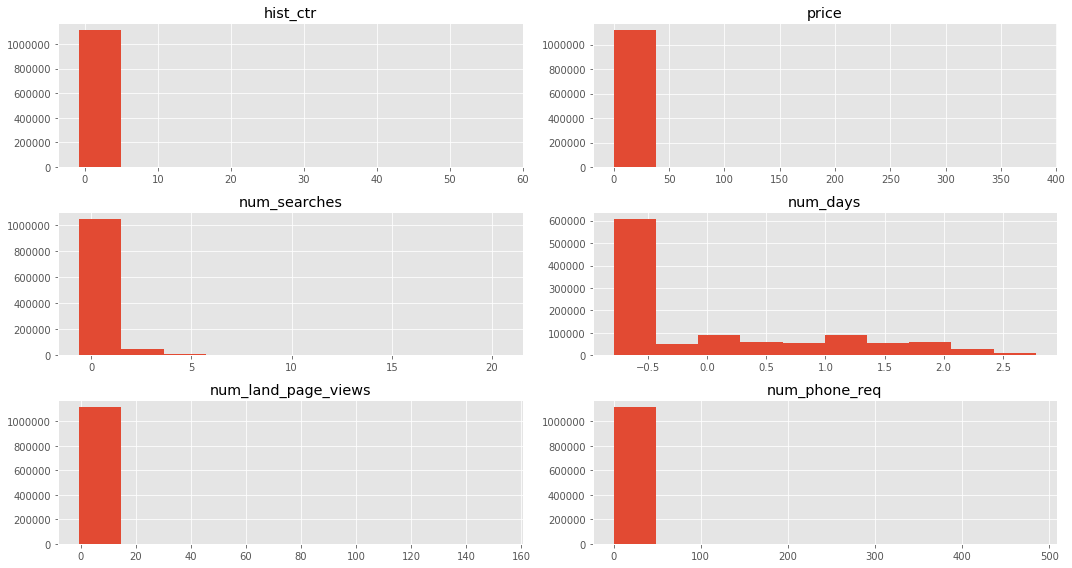

In [9]:
cols = ['hist_ctr', 'price', 'num_searches', 'num_days', 
        'num_land_page_views', 'num_phone_req', 'is_click']

scaler = StandardScaler()
plt.figure(figsize=(15,8))
for i, col in enumerate(cols[:6]):
    plt.subplot(3,2,i+1)
    plt.hist(scaler.fit_transform(df[[col]]))
    plt.title(col)
    plt.tight_layout()

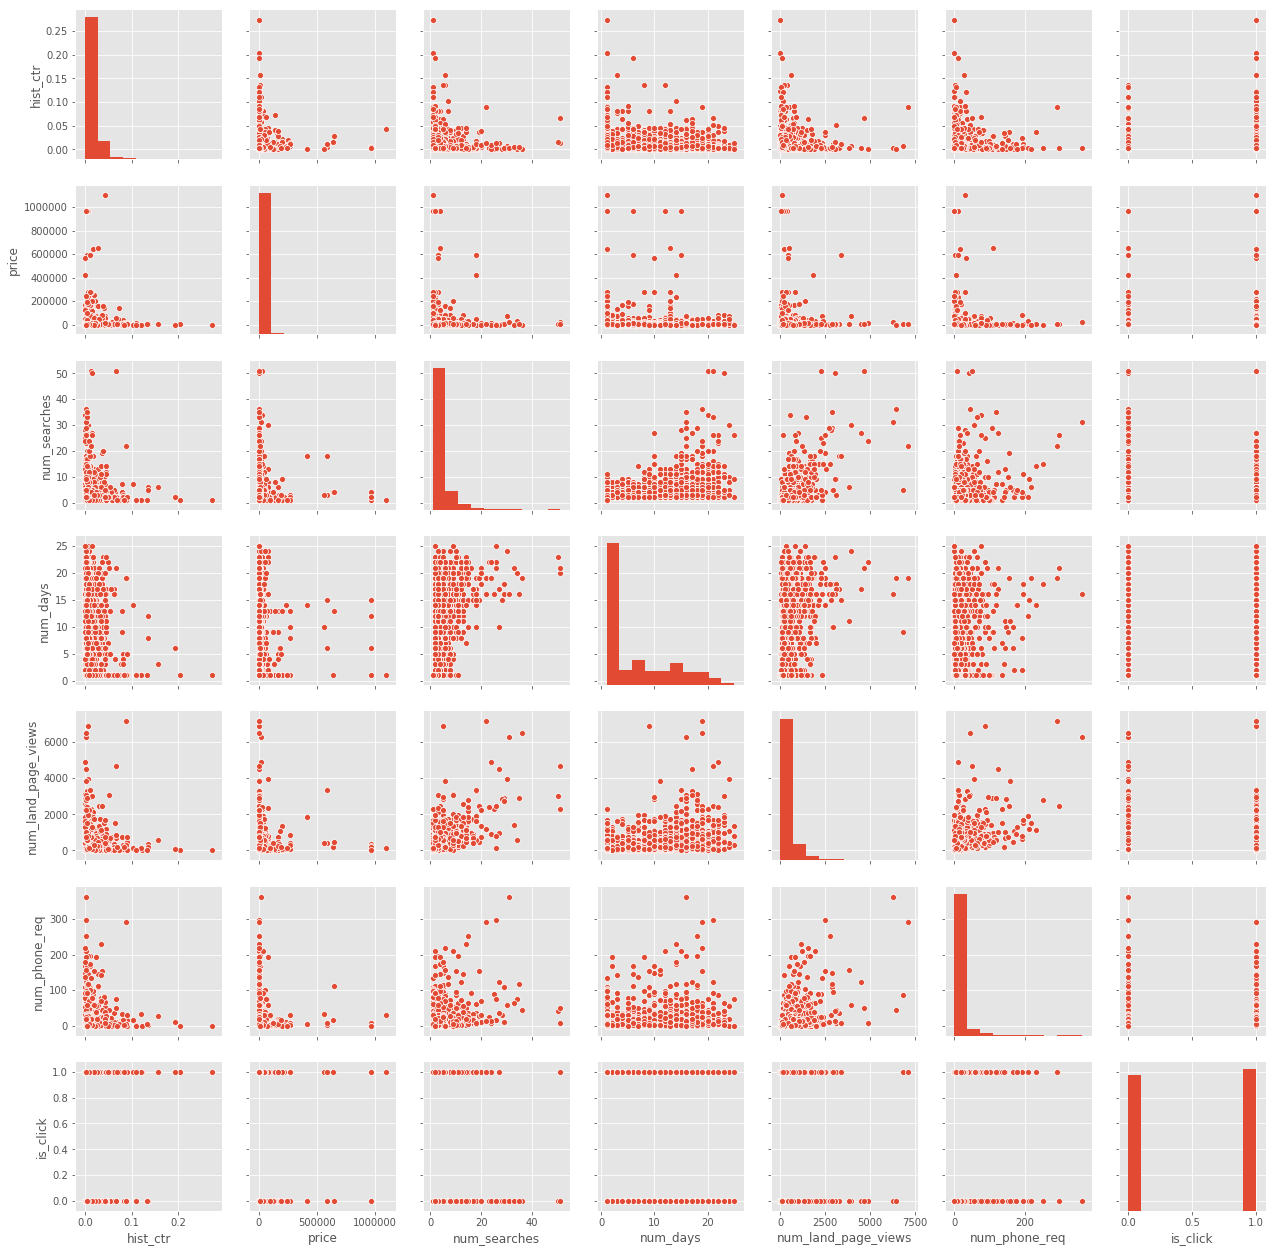

In [10]:
sns.pairplot(df[cols].sample(2000));